<a href="https://colab.research.google.com/github/MosheWasserb/PyTorchNotbooks/blob/master/Logistic_VAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from numpy.random import seed

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import * 
from keras.layers import *
from sklearn.metrics import accuracy_score
import tensorflow as tf

import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


Import Real Data Set 

In [0]:
TEST_SIZE=0.2
RANDOM_STATE=1
SAMPLE_SIZE = 10000
UNLABEL_SIZE = 50000
AUG_SIZE = 50000
train_size=100
MAX_FEATURES = 100

In [5]:
### read data from your Google Drive
from google.colab import drive
drive.mount('/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
data = pd.read_csv("/gdrive/My Drive/DataSet/GLUE/STS2/SST-2/train.tsv", delimiter='\t', header=None)

text_col=data.columns.values[0] 
category_col=data.columns.values[1]

data.head

batch_1 = data.sample(n=SAMPLE_SIZE, random_state=RANDOM_STATE);

In [7]:
train_texts, test_texts, train_labels, test_labels = train_test_split(batch_1[text_col],batch_1[category_col], train_size=train_size,random_state=RANDOM_STATE)
len(train_texts), len(test_texts), len(train_labels), len(test_labels)

(100, 9900, 100, 9900)

1. Ngram logistic

In [9]:
#CounterVecorizer(ngram_range=(1,3), min_df=0.2, max_df=0.7, max_features=10000, stop_words="english")
#ngramCount_baseline_model = make_pipeline(TfidfVectorizer(ngram_range=(1,2)), LogisticRegression(C=50)).fit(train_texts, train_labels)
ngramCount_baseline_model = make_pipeline(CountVectorizer(ngram_range=(1,2), max_features=MAX_FEATURES), LogisticRegression()).fit(train_texts, train_labels)
#ngramCount_baseline_model = make_pipeline(CountVectorizer(ngram_range=(1,2),stop_words="english",max_features=30000, max_df=0.75), LogisticRegression()).fit(train_texts, train_labels)
ngramCount_baseline_predicted = ngramCount_baseline_model.predict(test_texts)
print(classification_report(test_labels, ngramCount_baseline_predicted))
print(confusion_matrix(test_labels, ngramCount_baseline_predicted))

              precision    recall  f1-score   support

           0       0.46      0.39      0.42      4380
           1       0.57      0.63      0.60      5520

    accuracy                           0.53      9900
   macro avg       0.51      0.51      0.51      9900
weighted avg       0.52      0.53      0.52      9900

[[1717 2663]
 [2020 3500]]


In [0]:
test_labels.to_list()

2. Ngram MLP 

In [0]:
cntvec_model = CountVectorizer(ngram_range=(1,2), max_features=MAX_FEATURES)
X_train_sparse = cntvec_model.fit_transform(train_texts)
X_test_sparse  = cntvec_model.transform(test_texts)
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

Y_train = list(map(int,train_labels))
Y_test = list(map(int,test_labels))
Y_train_cat = keras.utils.to_categorical(train_labels)
Y_test_cat = keras.utils.to_categorical(test_labels)


Make the simulated datasets

In [0]:

from sklearn import datasets
from sklearn.model_selection import train_test_split

X, Y = datasets.make_blobs(n_samples=10000, centers=2, n_features=100, cluster_std = 1, random_state=42) 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size =10, random_state=42)

Y_train_cat = keras.utils.to_categorical( Y_train )
Y_test_cat = keras.utils.to_categorical( Y_test  )

#circles =  datasets.make_circles(n_samples=1000 , noise=.05 , factor=0.3 ,random_state=3 )
#circles_test =  datasets.make_circles(n_samples=10000 , noise=0 , factor=0.3 ,random_state=1 )

#n_poionts = 8
#inds = list (np.where(circles[1] == 0)[0][:n_poionts]) + list (np.where(circles[1] == 1)[0][:n_poionts])

#X_train = circles[0][inds]
#Y_train = circles[1][inds]
#Y_train_cat = keras.utils.to_categorical( circles[1][inds] )

#X_test = circles_test[0] 
#Y_test = circles_test[1] 
#Y_test_cat = keras.utils.to_categorical( circles_test[1]  )

n_classes = int( np.max(Y_train) + 1 )

Plot the dataset

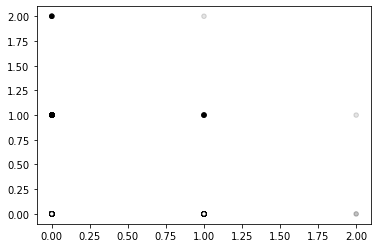

In [365]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, s=20 , cmap='winter'  , edgecolor='k' , alpha=0.005)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=20 , cmap='winter'   , edgecolor='k')
plt.show()

In [0]:
def plot_model_predictions( m ):
    
    xx, yy = np.meshgrid(np.arange(-1, 10, 1),
                         np.arange(-1, 10, 1))

    Z = m.predict(np.c_[xx.ravel(), yy.ravel()]).argmax(-1)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='Greens'   )
    plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, s=20 , cmap='winter'  , edgecolor='none' , alpha=0.5)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=20 , cmap='winter'   , edgecolor='k')
    
    plt.show()

Model without VAR

In [0]:
model = Sequential()
model.add( Dense(100 ,activation='relu' ,  input_shape=(MAX_FEATURES,)))
model.add( Dense(2 , activation='softmax' ))
model.compile( 'sgd' ,  'categorical_crossentropy'  ,  metrics=['accuracy'])

In [0]:
model.fit(  np.concatenate([X_train]*1000) , np.concatenate([Y_train_cat]*1000)  )
y_pred  = model.predict( X_test ).argmax(-1)
print( "Test accruracy " , accuracy_score(Y_test , y_pred  ))

In [0]:
plot_model_predictions( model  )

Model with VAT 

In [0]:
def compute_kld(p_logit, q_logit):
    p = tf.nn.softmax(p_logit)
    q = tf.nn.softmax(q_logit)
    return tf.reduce_sum(p*(tf.math.log(p + 1e-16) - tf.math.log(q + 1e-16)), axis=1)


def make_unit_norm(x):
    return x/(tf.reshape(tf.sqrt(tf.reduce_sum(tf.pow(x, 2.0), axis=1)), [-1, 1]) + 1e-16)

In [12]:
network = Sequential()
network.add( Dense(100 ,activation='relu' ,  input_shape=(MAX_FEATURES,)))
network.add( Dense(2   ))

model_input = Input((MAX_FEATURES,))
p_logit = network( model_input )
p = Activation('softmax')( p_logit )

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
r = tf.random.normal(shape=tf.shape( model_input ))
r = make_unit_norm( r )
p_logit_r = network( model_input + 10*r  )

In [0]:
kl = tf.reduce_mean(compute_kld( p_logit , p_logit_r ))
grad_kl = tf.gradients( kl , [r ])[0]
r_vadv = tf.stop_gradient(grad_kl)
r_vadv = make_unit_norm( r_vadv )/3.0

In [0]:
p_logit_no_gradient = tf.stop_gradient(p_logit)
p_logit_r_adv = network( model_input  + r_vadv )
vat_loss =  tf.reduce_mean(compute_kld( p_logit_no_gradient, p_logit_r_adv ))

In [0]:
model_vat = Model(model_input , p )
model_vat.add_loss( vat_loss   )

model_vat.compile( 'sgd' ,  'categorical_crossentropy'  ,  metrics=['accuracy'])

model_vat.metrics_names.append('vat_loss')
model_vat.metrics.append( vat_loss )

In [26]:
model_vat.fit(  np.concatenate([X_train]*1000) , np.concatenate([Y_train_cat]*1000)  )
y_pred  = model_vat.predict( X_test ).argmax(-1)
print( "Test accruracy " , accuracy_score(Y_test , y_pred  ))

Epoch 1/1
100000/100000 [==============================] - 5s 53us/step - loss: 0.3098 - accuracy: 0.8996
Test accruracy  0.5609090909090909


Plot the model output

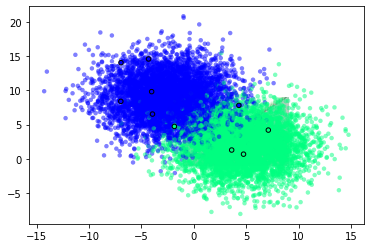

In [260]:
plot_model_predictions( model_vat  )